# Predicting customer buying behaviour

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_row', 14)
pd.set_option('display.max_column', 14)

In [3]:
data = pd.read_csv('/content/customer_booking.csv', encoding = "ISO-8859-1")

In [4]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


## EDA

**Objectif :**
*  Understand our data as well as possible
*  Develop an initial modeling strategy
*  some basic statistics 

**Basic checklist**

*Shape Analysis :*
*   **variable target :** booking_complete
*   **rows & columns :** (50000, 14)
*   **variable types :** qualitatives : 13, quantitatives : 1
*   **Analysis of missing values :** no missing values

*Background Analysis :*
*   **Visualization of the target :**
 *  15% of customer completed the booking (7478 / 42522)
*   **Meaning of variables :**

 *  variables continues non standardisées, skewed (asymétriques).
 *  variable qualitative : Almost binaire (0, 1), Higher Percentage of round trips, Internet, wants_extra_baggage, Asia-Pacific region and destination flight route (AKLKUL, PENTPE, MELSGN, ICNSIN, DMKKIX), Same percentage for flight departure days.
*   **Relation Variables / Target :**
 *  in all variables the rate of completed reservation lower than the rate of reservation not completed except wants_extra_baggage.
 *  target / Flight duration  : this hours (8.83, 8.58, 6.62, 7.00) are more completed the booking.
 *  target / Purchase lead time & Length of stay & number of passengers : decrease strictly of the rate of completed the booking (not completed the booking).  
 *  target / Flight hour : a high percentage(5%) of completed the booking when the number of flight hours between 1 and 15.
 *  target / num_passengers & sales_channel : almost
 passengers between 6 and 9 are completed the booking with Mobile.
 *  target / num_passengers & type_trip : almost
 passengers that chose OnWay and CircleTrip are completed the booking.
 *  target / num_passengers & wants_in_flight_meals : less almost passengers that don't want in flight meals are completed the booking.

 *  target / num_passengers & route	 : most rated destination flight route (BKIKTM, AKLPEK, PVGSGN, ICNSDK) of completed the booking.
 *   target / num_passengers & booking_origin : most rated country from where booking was made (Kazakhstan, Bahrain,	Romania) of completed the booking.	
 
*Analyse plus détaillée*	
*   **Relation Variables / Variables :**

 *   Any correlated variables 
 *   num_passengers / colm_D_H : flight_duration have some difference in distribution of completed the booking, doing same features engineering later

### Shape Analysis

In [5]:
df = data.copy()

In [6]:
df.shape

(50000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
df.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

<Axes: >

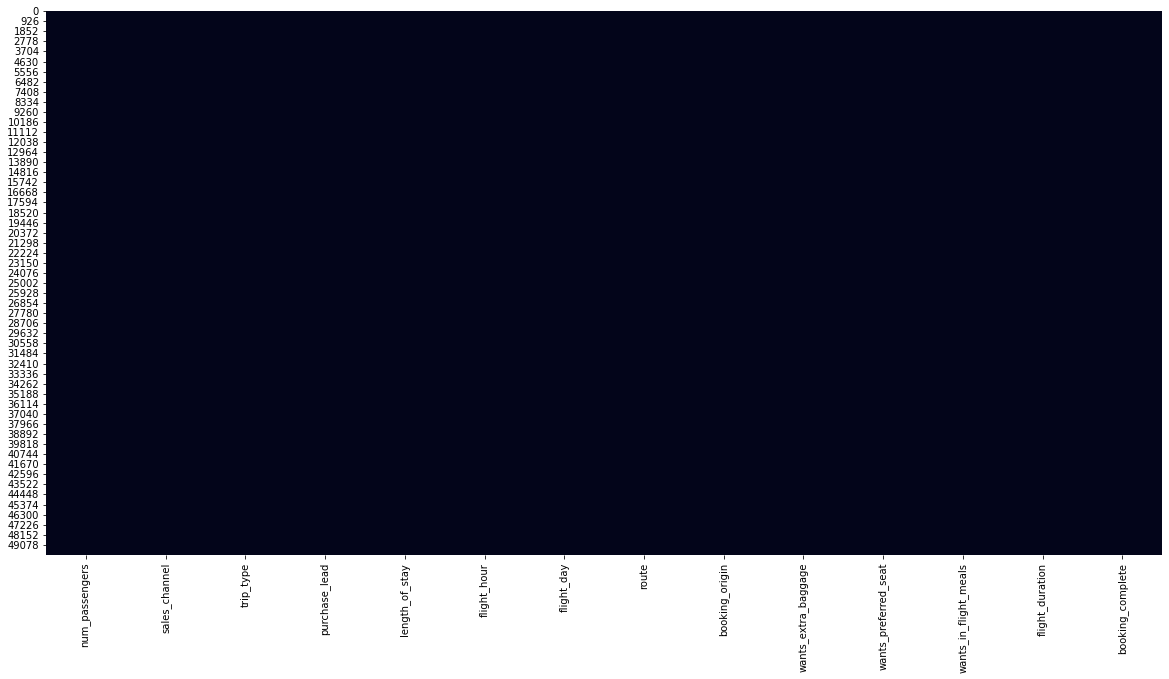

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Background Analysis

 The target

In [10]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [11]:
df['booking_complete'].value_counts(normalize=True)

0    0.85044
1    0.14956
Name: booking_complete, dtype: float64

Histogram of continuous variable

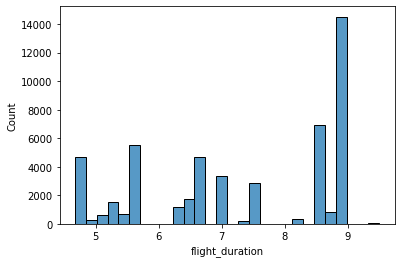

In [12]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col])

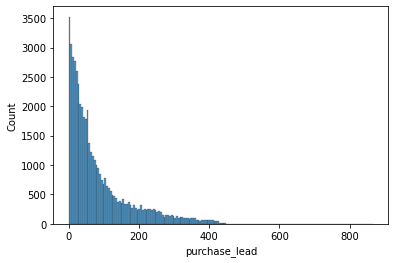

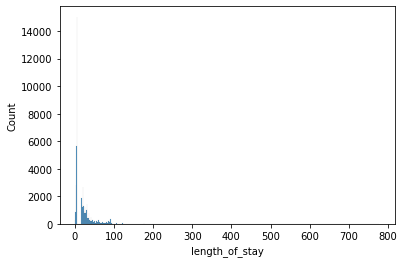

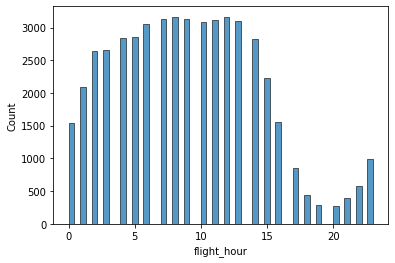

In [13]:
for col in df.select_dtypes('int'):
    if len(df[col].unique()) > 9 :
      plt.figure()
      sns.histplot(df[col])

Qualitatives Variables / Categorical Variables

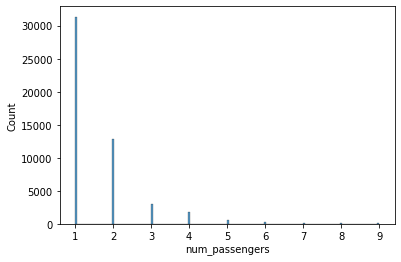

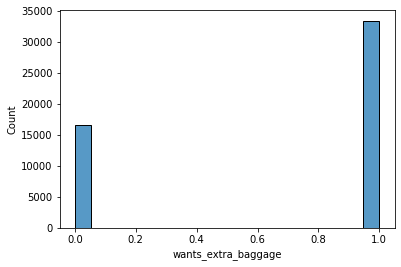

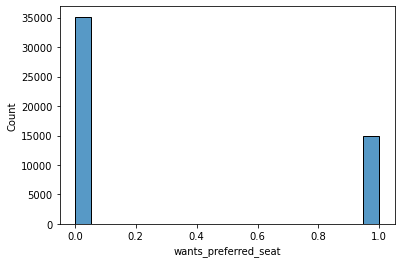

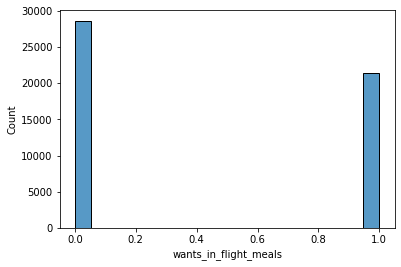

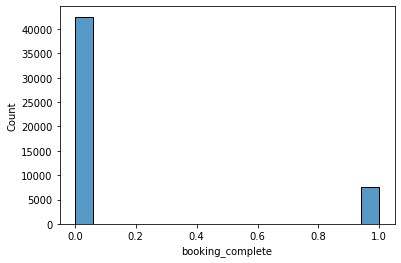

In [14]:
for col in df.select_dtypes('int'):
    if len(df[col].unique()) <=9 :
      plt.figure()
      sns.histplot(df[col])

In [15]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

sales_channel------- ['Internet' 'Mobile']
trip_type----------- ['RoundTrip' 'CircleTrip' 'OneWay']
flight_day---------- ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
route--------------- ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' '

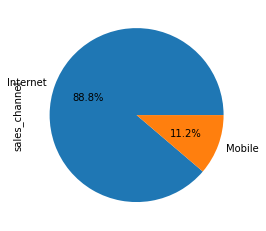

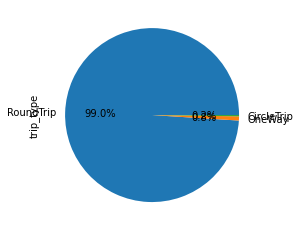

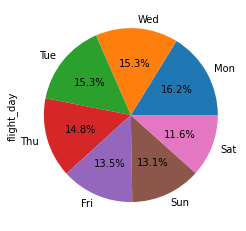

In [16]:
for col in df.select_dtypes('object'):
    if len(df[col].unique()) <=7 :
      plt.figure()
      df[col].value_counts().plot.pie(autopct='%1.1f%%')

In [17]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

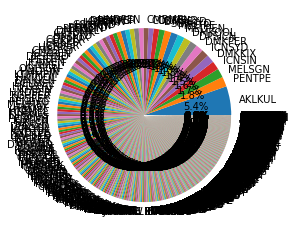

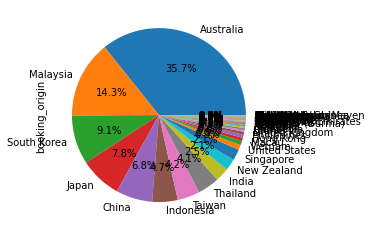

In [18]:
for col in df.select_dtypes('object'):
    if len(df[col].unique()) > 7 :
      plt.figure()
      df[col].value_counts().plot.pie(autopct='%1.1f%%')

In [19]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

### Relation Target / Variables

In [20]:
df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


In [21]:
sns.set_style('whitegrid')

In [22]:
def catplot(data_, x_, title_, xlabel_, kind='count'):
  # Create the catplot with hue and specify size and aspect ratio
  g = sns.catplot(data=data_, x=x_, kind='count', hue='booking_complete', height=6, aspect=1.5)

  # Get the total number of observations in each group
  total = float(len(df))

  # Loop over the bars and add the percentage as a text label
  for p in g.ax.patches:
      height = p.get_height()
      if height/total*100 >= 0.5 :
        g.ax.text(p.get_x()+p.get_width()/2.,
                  height + 3,
                  '{:.1f}%'.format(height/total*100),
                  ha="center", va='bottom')
      
  # Set title and axis labels
  g.set(title=title_, xlabel=xlabel_, ylabel='Count')

  # Show the plot
  plt.show()

In [23]:
def histplot(df_, x__, title__, xlabel__):
  plt.figure(figsize=(10, 6))
  # Create the histplot with hue and specify number of bins
  g = sns.histplot(data=df_, x=x__, hue='booking_complete', bins=30)

  # Get the total number of observations in each group
  total = float(len(df))

  # Loop over the bars and add the percentage as a text label
  for p in g.patches:
      height = p.get_height()
      if height/total*100 >= 0.5 :

        g.annotate('{:.1f}%'.format(height/total*100), 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', va='bottom')
      
  # Set title and axis labels
  g.set(title=title__, xlabel=xlabel__, ylabel='Count')

  # Show the plot
  plt.show()

target / fight_duration

In [24]:
df['flight_duration'].value_counts()

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
        ...  
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, Length: 21, dtype: int64

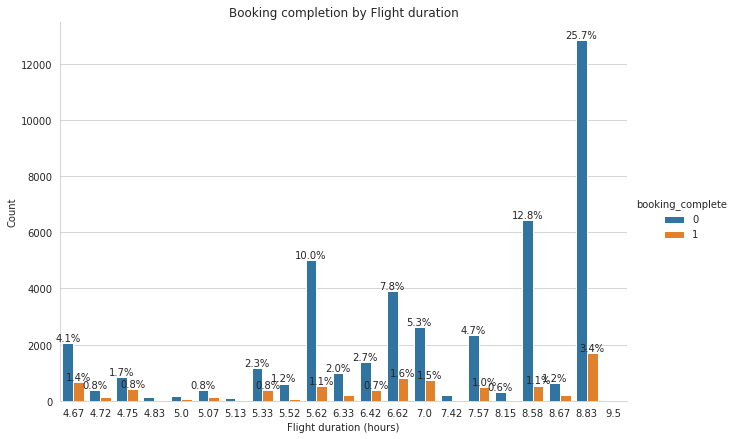

In [25]:
catplot(df, 'flight_duration', 'Booking completion by Flight duration', 'Flight duration (hours)')

target / purchase_lead

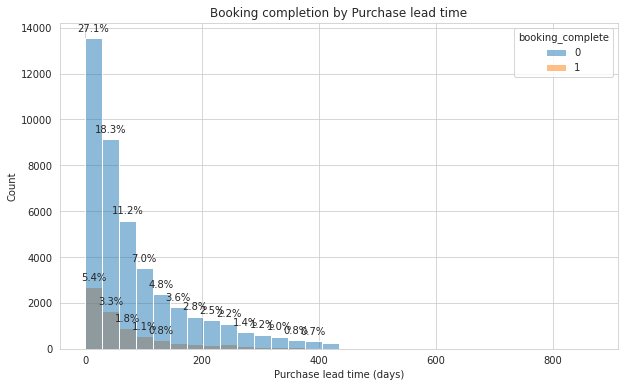

In [26]:
histplot(df, 'purchase_lead', 'Booking completion by Purchase lead time', 'Purchase lead time (days)')

target / length_of_stay

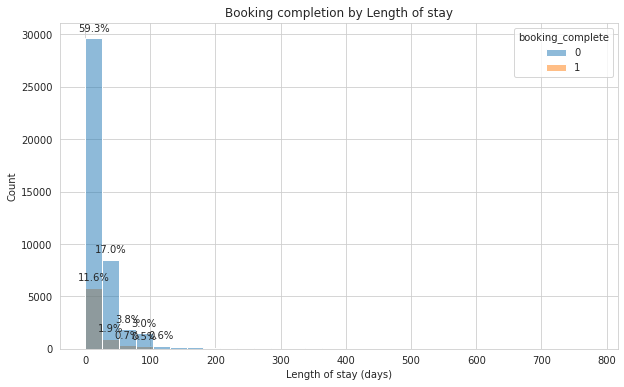

In [27]:
histplot(df, 'length_of_stay', 'Booking completion by Length of stay', 'Length of stay (days)')

target / number of passengers 

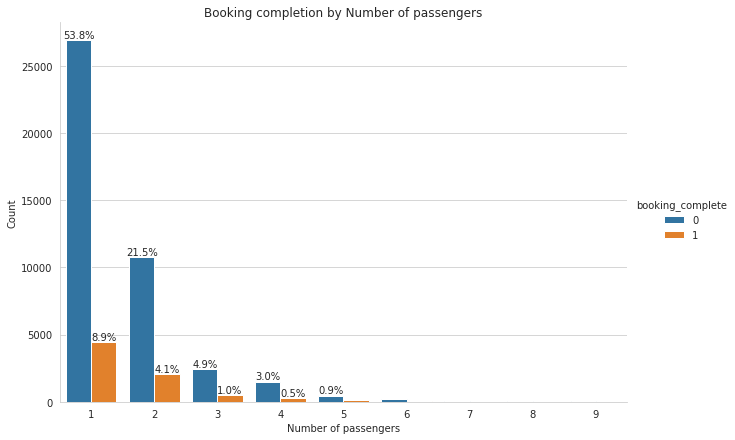

In [28]:
catplot(df, 'num_passengers', 'Booking completion by Number of passengers', 'Number of passengers')

target / flight_hour

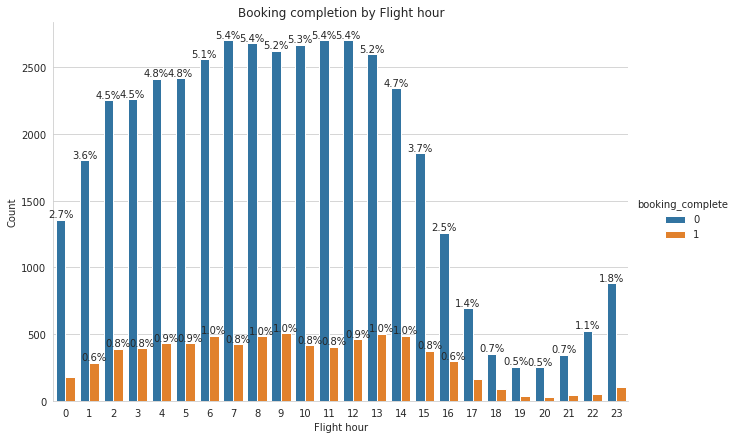

In [29]:
catplot(df, 'flight_hour', 'Booking completion by Flight hour', 'Flight hour')

target / num_passengers & sales_channel

In [30]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

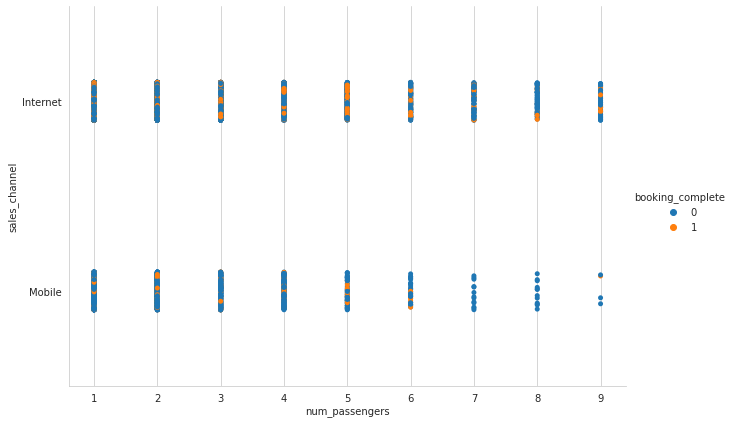

In [31]:
sns.catplot(data=df, x='num_passengers', y='sales_channel' ,hue='booking_complete', height=6,  aspect = 1.5)

target / num_passengers & trip_type

In [32]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

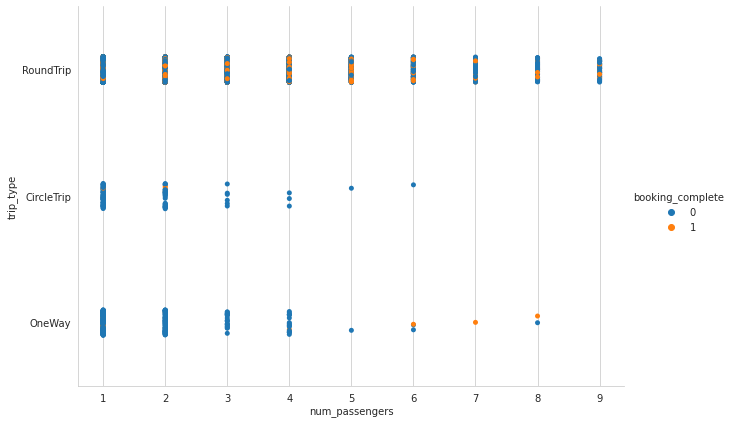

In [33]:
sns.catplot(data=df, x='num_passengers', y='trip_type', hue='booking_complete', height=6,  aspect = 1.5)

target / num_passengers & wants_in_flight_meals

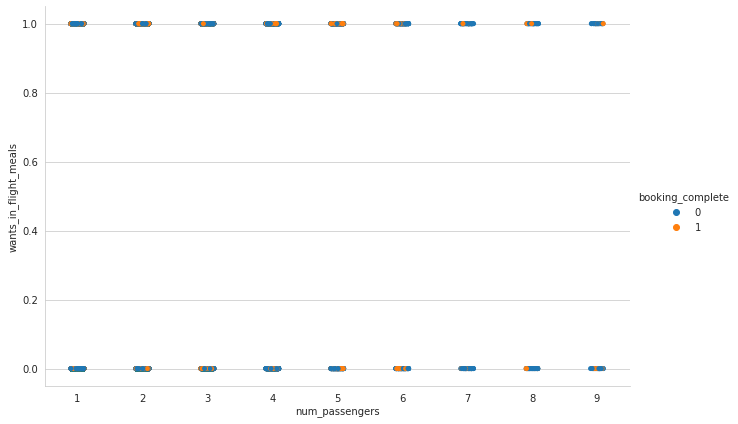

In [34]:
sns.catplot(data=df, x='num_passengers', y='wants_in_flight_meals', hue='booking_complete', height=6,  aspect = 1.5)

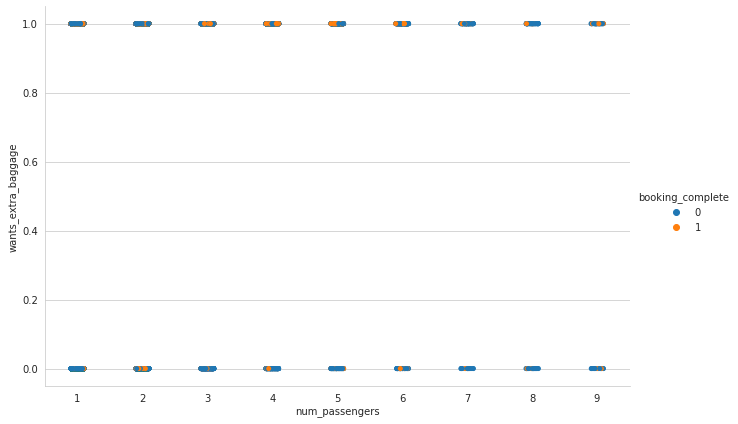

In [35]:
sns.catplot(data=df, x='num_passengers', y='wants_extra_baggage', hue='booking_complete', height=6,  aspect = 1.5)

#### success rate by booking_complete of each column

success rate by booking_complete of each flight_day

In [36]:
# HINT use groupby method on _x column and get the mean of booking_complete column
def Plot_rate_booking_complete_success_of(_x):
  x_success = df.groupby(_x)['booking_complete'].mean().sort_values(ascending=False).reset_index()
  if (_x == 'route'):
    x_success = x_success[(x_success['booking_complete'] >= 0.5) ]
  if (_x ==	'booking_origin'):
    x_success = x_success[(x_success['booking_complete'] >= 0.23) ]
  fig, ax=plt.subplots(figsize=(12,6))
  ax = sns.barplot(x=_x, y="booking_complete", data=x_success, hue='booking_complete', dodge=False)
  ax.set_title(f'Plot of success rate by booking_complete of each {_x}' , fontdict={'size':12})
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

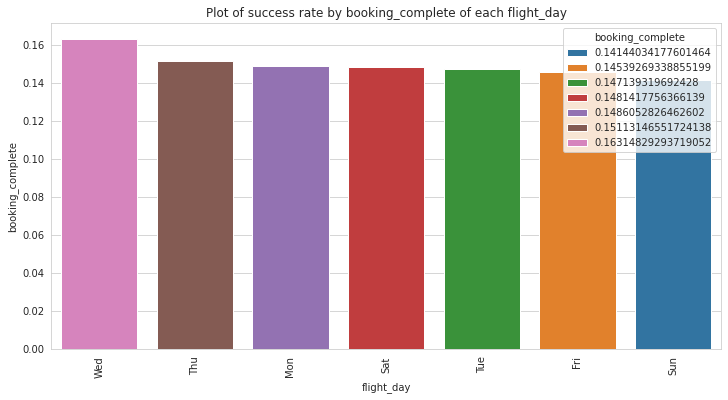

In [37]:
Plot_rate_booking_complete_success_of('flight_day')

success rate by booking_complete of each route

In [38]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [39]:
booking_origin_success = df.groupby('booking_origin')['booking_complete'].mean().sort_values(ascending=False).reset_index()
booking_origin_success = booking_origin_success[(booking_origin_success['booking_complete'] >= 0.5) & (booking_origin_success['booking_complete'] < 1)]
booking_origin_success

,booking_origin,booking_complete
4,Kazakhstan,0.666667
5,Bahrain,0.600000
6,Romania,0.500000


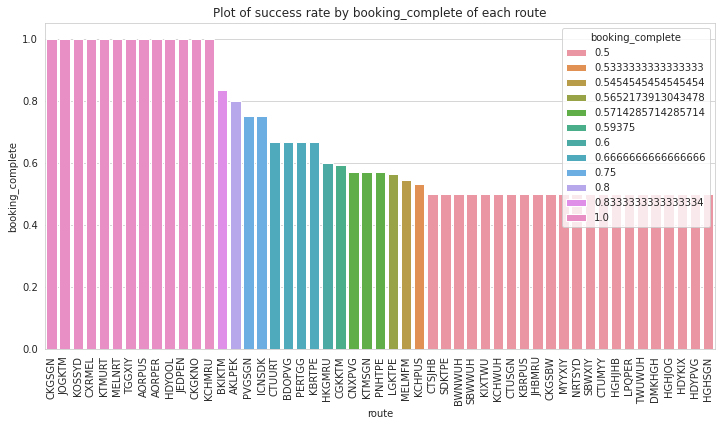

In [40]:
Plot_rate_booking_complete_success_of('route')

success rate by booking_complete of each booking_origin

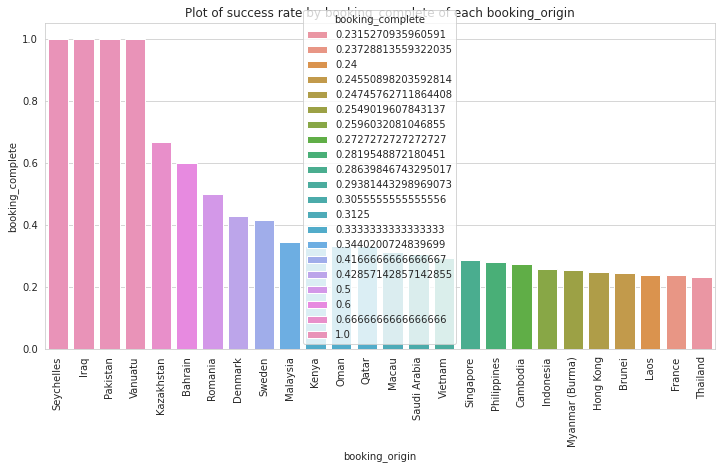

In [41]:
Plot_rate_booking_complete_success_of('booking_origin')

success rate by booking_complete of each wants_extra_baggage

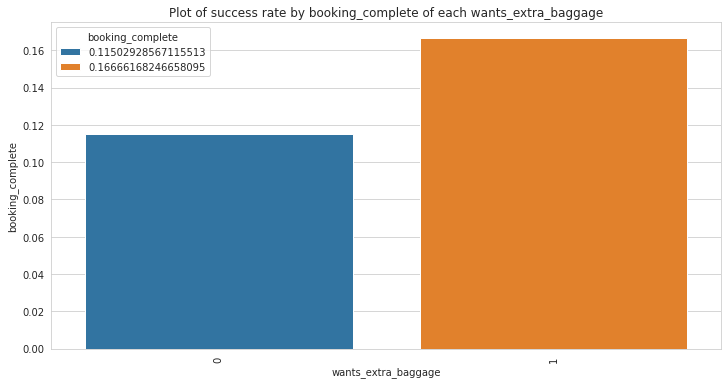

In [42]:
Plot_rate_booking_complete_success_of('wants_extra_baggage')

success rate by booking_complete of each num_passengers	

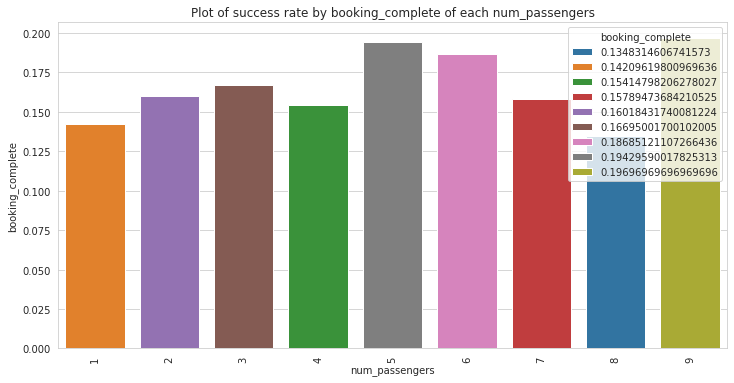

In [43]:
Plot_rate_booking_complete_success_of('num_passengers')

### Variables / Variables

In [44]:
colm_D_H=['num_passengers', 'purchase_lead',	'length_of_stay',	'flight_hour', 'flight_duration']

In [45]:
df[colm_D_H].corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration
num_passengers,1.000000,0.212606,-0.115850,0.015607,-0.063169
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.067866
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.141181
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.002101
flight_duration,-0.063169,0.067866,0.141181,-0.002101,1.000000


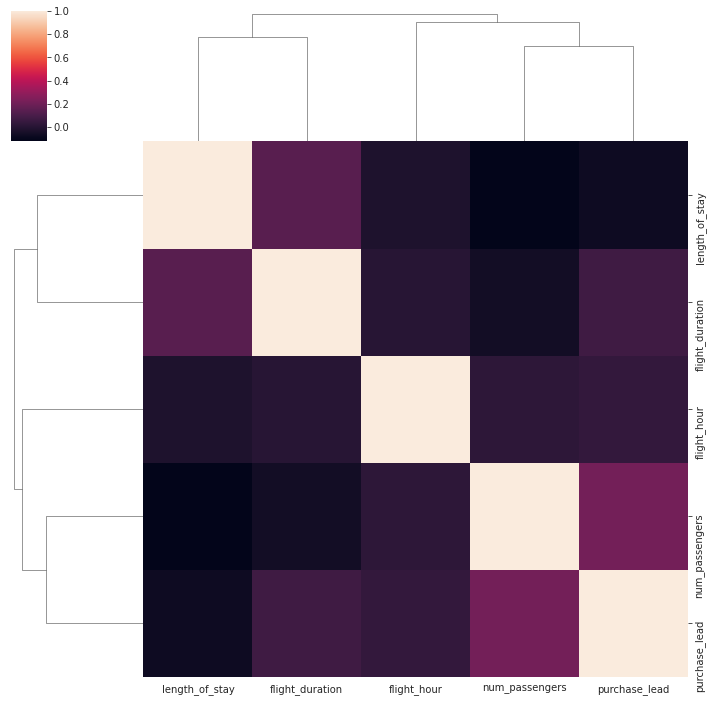

In [46]:
sns.clustermap(df[colm_D_H].corr())

<Figure size 432x288 with 0 Axes>

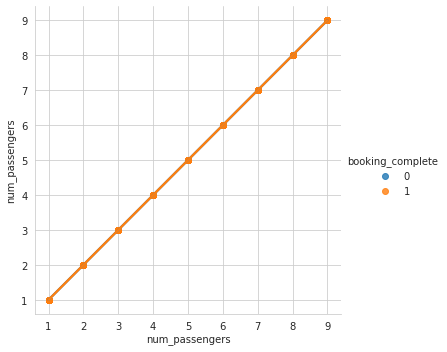

<Figure size 432x288 with 0 Axes>

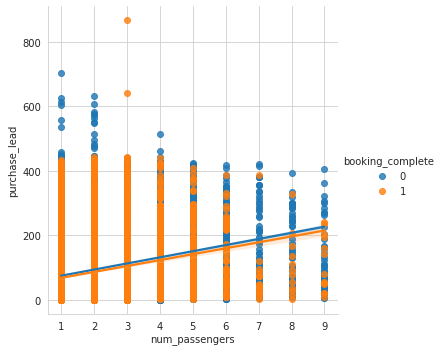

<Figure size 432x288 with 0 Axes>

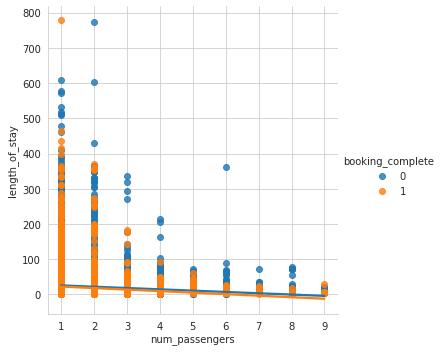

<Figure size 432x288 with 0 Axes>

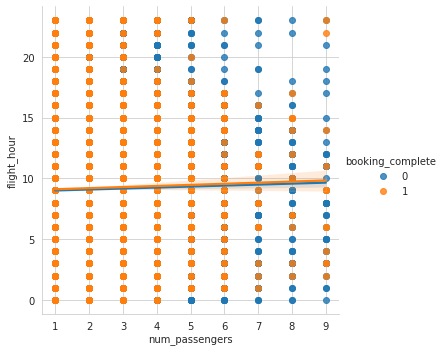

<Figure size 432x288 with 0 Axes>

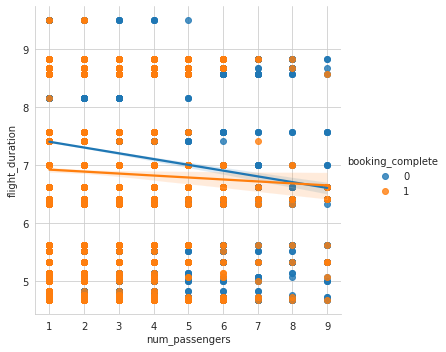

In [47]:
for col in colm_D_H:
    plt.figure()
    sns.lmplot(x='num_passengers', y=col, hue='booking_complete', data=df)

In [48]:
x_success = df.groupby('num_passengers').mean().reset_index()
x_success = x_success.rename(columns={'booking_complete' : 'booking_complete_x'})
x_success

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete_x
0,1,68.787797,26.054542,8.983701,0.623501,0.279217,0.421121,7.334135,0.142096
1,2,105.661903,19.555373,9.200875,0.721571,0.329428,0.423461,7.230318,0.160184
2,3,117.935736,15.901054,9.113567,0.774906,0.326420,0.462428,7.120561,0.166950
3,4,136.809978,14.293722,9.307175,0.816704,0.334641,0.485987,7.114496,0.154148
4,5,138.008913,12.818182,9.743316,0.832442,0.319073,0.458111,7.135437,0.194296
5,6,129.332180,10.740484,8.885813,0.816609,0.283737,0.467128,6.865052,0.186851
6,7,119.464912,9.228070,9.140351,0.850877,0.236842,0.491228,6.574298,0.157895
7,8,117.337079,10.719101,9.056180,0.730337,0.235955,0.359551,6.485730,0.134831
8,9,116.878788,6.257576,8.530303,0.772727,0.151515,0.378788,6.268939,0.196970


In [49]:
colm_bi=['wants_extra_baggage',	'wants_preferred_seat',	'wants_in_flight_meals']

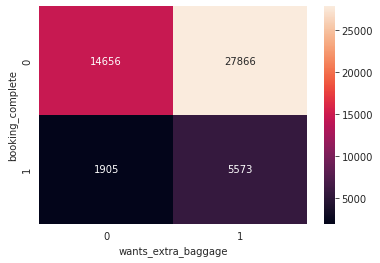

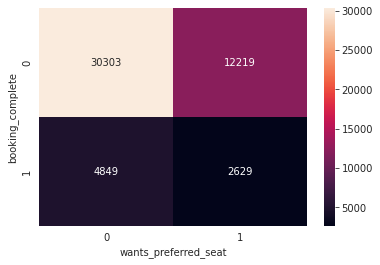

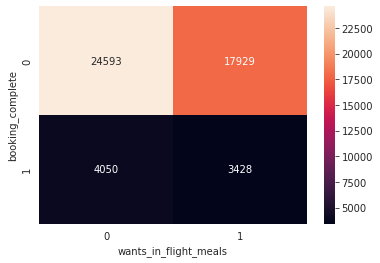

In [50]:
for col in colm_bi:
    plt.figure()
    sns.heatmap(pd.crosstab(df['booking_complete'], df[col]), annot=True, fmt='d')

In [51]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [52]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [53]:
completed_df = df[df['booking_complete'] == 1]
uncompleted_df = df[df['booking_complete'] == 0]

<ipython-input-54-3eb6ccb0e369>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(completed_df[col], label='positive')
<ipython-input-54-3eb6ccb0e369>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uncompleted_df[col], label='negative')
<ipython-input-54-3eb6ccb0e369>:3: UserWarning: 

`distplo

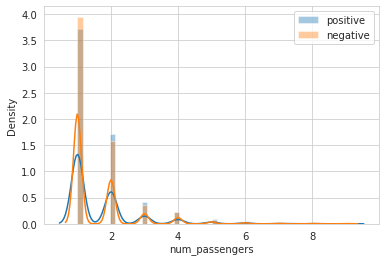

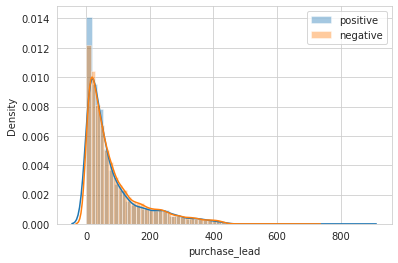

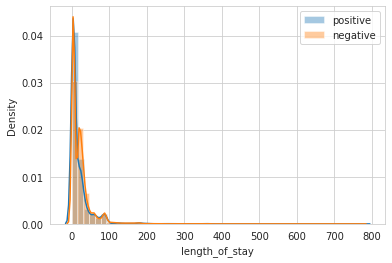

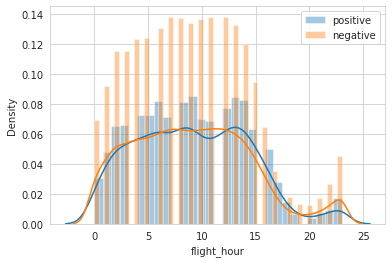

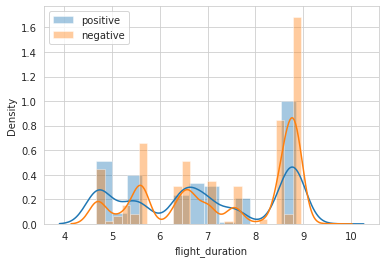

In [54]:
for col in colm_D_H:
    plt.figure()
    sns.distplot(completed_df[col], label='positive')
    sns.distplot(uncompleted_df[col], label='negative')
    plt.legend()

<ipython-input-55-9bc5cd547472>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(completed_df[col], label='positive')
<ipython-input-55-9bc5cd547472>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uncompleted_df[col], label='negative')
<ipython-input-55-9bc5cd547472>:3: UserWarning: 

`distplo

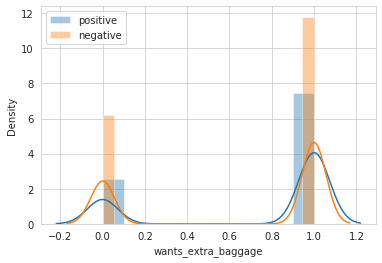

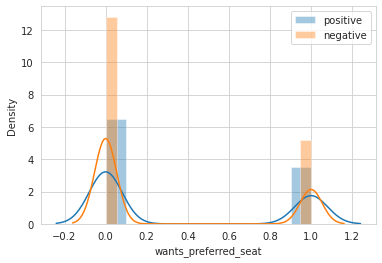

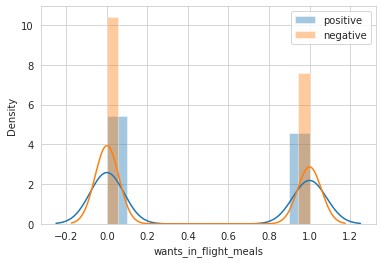

In [55]:
for col in colm_bi:
    plt.figure()
    sns.distplot(completed_df[col], label='positive')
    sns.distplot(uncompleted_df[col], label='negative')
    plt.legend()

## PRE-PROCESSING

In [159]:
dft = df.copy()

### TrainTest - Nettoyage - Encodage 

In [170]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(dft, test_size=0.2, random_state=0)

In [171]:
trainset.shape

(40000, 14)

In [162]:
trainset['booking_complete'].value_counts()

0    34035
1     5965
Name: booking_complete, dtype: int64

In [163]:
testset['booking_complete'].value_counts()

0    8487
1    1513
Name: booking_complete, dtype: int64

In [63]:
dft.head(1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0


In [172]:
def find_similar(liste1, liste2):
    # Use the intersection operator "&" to find common elements
    similar = list(set(liste1) & set(liste2))
    return similar

In [173]:
def supp(trainset, testset, colm):
  # Compter le nombre d'occurrences de chaque valeur dans la colonne colm
  colm_counts_train = trainset[colm].value_counts()
  colm_counts_test = testset[colm].value_counts()

  # Créer un masque booléen pour sélectionner les valeurs avec plus de 50 occurrences
  mask_train = colm_counts_train[trainset[colm]].values >= 50
  mask_test = colm_counts_test[testset[colm]].values >= 50

  # Supprimer les valeurs 
  trainset = trainset[mask_train]
  testset = testset[mask_test]

  # Find similar routes between trainset and testset
  colm_sim = find_similar(trainset[colm].unique(), testset[colm].unique())
  # Filter trainset to contain only lines corresponding to similar colms
  trainset = trainset[trainset[colm].isin(colm_sim)]
  # Filter testset to contain only lines corresponding to similar colms
  testset = testset[testset[colm].isin(colm_sim)]

  
  return trainset, testset

In [174]:
trainset, testset = supp(trainset, testset,'route')

In [175]:
trainset, testset = supp(trainset, testset,'booking_origin')

In [147]:
# Find similar routes between trainset and testset
route_sim = find_similar(trainset['route'].unique(), testset['route'].unique())
# Filter trainset to contain only lines corresponding to similar routes
trainset = trainset[trainset['route'].isin(route_sim)]
# Filter testset to contain only lines corresponding to similar routes
testset = testset[testset['route'].isin(route_sim)]

# Find similar routes between trainset and testset
origin_sim = find_similar(trainset['booking_origin'].unique(), testset['booking_origin'].unique())
# Filter trainset to contain only lines corresponding to similar booking_origin
trainset = trainset[trainset['booking_origin'].isin(origin_sim)]
# Filter testset to contain only lines corresponding to similar booking_origin
testset = testset[testset['booking_origin'].isin(origin_sim)]


In [176]:
trainset['route'].value_counts()

AKLKUL    1985
PENTPE     747
MELSGN     665
ICNSIN     643
DMKKIX     566
          ... 
KCHPER     202
HNDPER     201
DELMEL     191
HKTKIX     178
PERPNH     151
Name: route, Length: 49, dtype: int64

In [177]:
testset['route'].value_counts()

AKLKUL    496
DMKKIX    165
MELSGN    162
PENTPE    155
ICNSIN    141
         ... 
KIXSIN     53
PERPNH     50
KCHPER     49
CMBSYD     47
HYDSYD     47
Name: route, Length: 49, dtype: int64

In [179]:
testset['booking_origin'].value_counts()

Australia      1816
Malaysia        775
South Korea     442
Japan           371
Thailand        280
New Zealand     185
Indonesia       156
Taiwan          143
Singapore       117
China            90
India            57
Macau            56
Vietnam          50
Name: booking_origin, dtype: int64

In [178]:
trainset['booking_origin'].value_counts()

Australia      7139
Malaysia       3151
South Korea    1845
Japan          1480
Thailand       1038
New Zealand     793
Indonesia       691
Taiwan          550
Singapore       464
China           295
Macau           205
Vietnam         190
India           187
Name: booking_origin, dtype: int64

In [180]:
def encodage(df):
    
    # Transform into categorical type
    df['sales_channel'] = df['sales_channel'].astype('category')
    df = pd.get_dummies(df, columns=['sales_channel'], prefix='channel')

    df['trip_type'] = df['trip_type'].astype('category')
    df = pd.get_dummies(df, columns=['trip_type'], prefix='trip')

    df['flight_day'] = df['flight_day'].astype('category')
    df = pd.get_dummies(df, columns=['flight_day'], prefix='day')

    df['route'] = df['route'].astype('category')
    df = pd.get_dummies(df, columns=['route'], prefix='route')

    df['booking_origin'] = df['booking_origin'].astype('category')
    df = pd.get_dummies(df, columns=['booking_origin'], prefix='booking_origin')
        
    return df

In [ ]:
def encodage1(df):
    # Transform into categorical type
    df['sales_channel'] = df['sales_channel'].astype('category')
    df['trip_type'] = df['trip_type'].astype('category')
    df['flight_day'] = df['flight_day'].astype('category')
    df['route'] = df['route'].astype('category')
    df['booking_origin'] = df['booking_origin'].astype('category')
    df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])
        
    return df

In [ ]:
def feature_engineering(df):
    
    return df

In [181]:
def imputation(df):
    #df['is na'] = (df['sales_channel'].isna()) | (df['trip_type'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [182]:
def preprocessing(df):
    
    df = encodage(df)
    #df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('booking_complete', axis=1)
    y = df['booking_complete']
    
    print(y.value_counts())
    
    return X, y

In [183]:
X_train, y_train = preprocessing(trainset)

0    15311
1     2717
Name: booking_complete, dtype: int64


In [184]:
X_train.shape

(18028, 82)

In [185]:
X_test, y_test = preprocessing(testset)

0    3865
1     673
Name: booking_complete, dtype: int64


In [186]:
X_test.shape

(4538, 82)

### Modelisation

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
model = DecisionTreeClassifier(random_state=0)

### Evaluation procedure

In [189]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [190]:

def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
   
    
    

[[3388  477]
 [ 450  223]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3865
           1       0.32      0.33      0.32       673

    accuracy                           0.80      4538
   macro avg       0.60      0.60      0.60      4538
weighted avg       0.80      0.80      0.80      4538



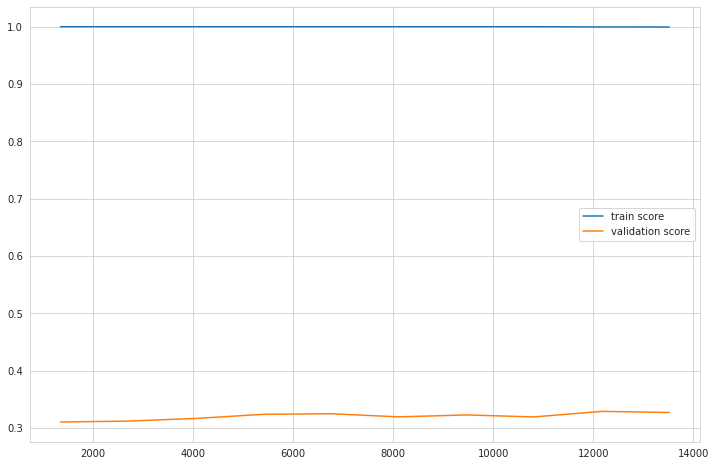

In [191]:
evaluation(model)

<Axes: >

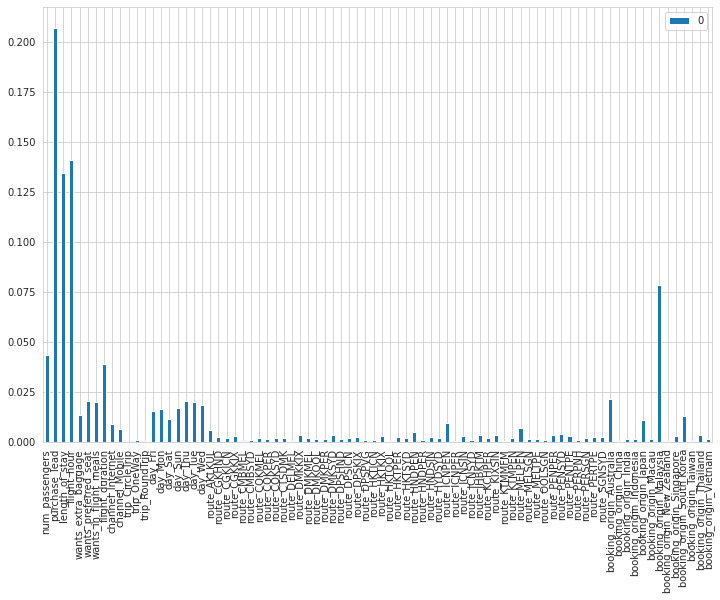

In [196]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))